<a href="https://colab.research.google.com/github/Lionel-Lim/casa0018/blob/main/Assessment/Projects/Final%20Project/src/trainingData/test_6/test6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

In [ ]:
os.environ['TF_XLA_FLAGS'] = ''

In [ ]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("500")')

In [ ]:
!wget https://raw.githubusercontent.com/Lionel-Lim/casa0018/main/Assessment/Projects/Final%20Project/src/trainingData/test_6/test_6_2.zip
!unzip test_6_2.zip

In [ ]:
# Define the headers
headers = ['timestamp', 'status', 'orientation', 'position', 'acceleration', 'grid']

# Read in the CSV files as DataFrames
df = pd.read_csv("filtered_grid2.csv",header=None, names=headers)

# Preview Image

<PIL.Image.Image image mode=RGB size=640x400 at 0x7F08C3611790>


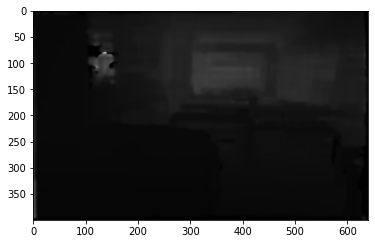

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/depth_filtered/264.238462634.png')
plt.imshow(img)
print(img)

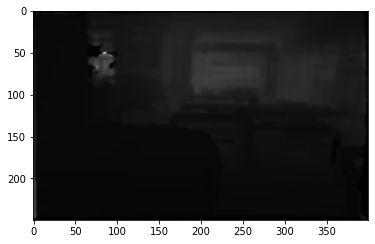

In [ ]:

# Resize the image
resized = tf.image.resize(img, [400, 400], preserve_aspect_ratio=True)
resized = resized / 255.0
plt.imshow(resized)
# print(resized)

# Normalize the pixel values to the range [0, 1]
# image = image / 255.0

# Processing

In [ ]:
# Add a new column for the depth images
df['depth_image'] = None
# Load the depth images and add them to the DataFrame
imageAddress = '/content/depth_filtered'
file_names = [f for f in os.listdir(imageAddress) if os.path.isfile(os.path.join(imageAddress, f))]
for i, row in df.iterrows():
    # Get the timestamp and image file name
    timestamp = row['timestamp']
    partial_image_name = f"{timestamp}.png"
    for name in file_names:
      # print(f"{partial_image_name} ------ {name}")
      if partial_image_name == name:
        image_name = name
        break
    # Load the image and convert it to a numpy array
    image_path = os.path.join(imageAddress, image_name)
    image = Image.open(image_path)
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Reshape the array to have the correct dimensions
    image_array = image_array.reshape((1, 400, 640, 1))

    # Add the image array to the DataFrame
    df.at[i, 'depth_image'] = image_array
  
del file_names

In [ ]:
# Split the orientation column into four separate columns
df[['ori_w', 'ori_x', 'ori_y', 'ori_z']] = df['orientation'].str.split('/', expand=True)

# Split the position column into three separate columns
df[['pos_x', 'pos_y', 'pos_z']] = df['position'].str.split('/', expand=True)

# Split the acceleration column into three separate columns
df[['acc_x', 'acc_y', 'acc_z']] = df['acceleration'].str.split('/', expand=True)

# Convert the data types of the columns to float32
df = df.astype({'ori_w': 'float32', 'ori_x': 'float32', 'ori_y': 'float32', 'ori_z': 'float32', 'pos_x': 'float32', 'pos_y': 'float32', 'pos_z': 'float32', 'acc_x': 'float32', 'acc_y': 'float32', 'acc_z': 'float32'})
df['depth_image'] = df['depth_image'].apply(lambda x: x.astype('float32'))

df = df.drop(['orientation', 'position', 'acceleration'], axis=1)
df

,timestamp,status,grid,depth_image,ori_w,ori_x,ori_y,ori_z,pos_x,pos_y,pos_z,acc_x,acc_y,acc_z
0,264.238463,TRACKING,1,"[[[[2.], [1.], [2.], [1.], [1.], [2.], [1.], [...",0.417939,-0.598418,0.524989,-0.437732,-0.031889,0.059385,0.004994,-0.011441,-0.003023,-0.000632
1,264.975973,TRACKING,1,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",0.405154,-0.664731,0.518506,-0.353743,0.021404,0.041771,-0.051807,-0.000932,-0.000246,-0.000052
2,265.040665,TRACKING,1,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [...",0.402942,-0.661570,0.517687,-0.363268,0.034566,0.045106,-0.047962,-0.003455,-0.000913,-0.000191
3,265.243081,TRACKING,1,"[[[[2.], [2.], [2.], [2.], [2.], [2.], [2.], [...",0.405493,-0.638414,0.519351,-0.397842,0.023482,0.029755,-0.052186,-0.006605,-0.001745,-0.000365
4,265.442838,TRACKING,1,"[[[[2.], [2.], [2.], [2.], [2.], [2.], [2.], [...",0.420990,-0.633100,0.517592,-0.392492,-0.009129,0.038181,0.031317,-0.002688,-0.000710,-0.000149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,839.758536,TRACKING,16,"[[[[6.], [6.], [6.], [6.], [6.], [6.], [7.], [...",0.636151,-0.734113,-0.179603,0.155346,2.103317,-3.283316,-0.694751,-0.000054,-0.000014,-0.000003
2867,839.993309,TRACKING,16,"[[[[2.], [2.], [2.], [2.], [2.], [2.], [2.], [...",0.655809,-0.717041,-0.171766,0.162060,1.982695,-3.132685,-0.670007,-0.008001,-0.002114,-0.000442
2868,840.193062,TRACKING,16,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",0.651622,-0.719513,-0.166087,0.173511,1.920003,-3.064002,-0.663477,-0.001704,-0.000450,-0.000094
2869,840.361717,TRACKING,16,"[[[[1.], [1.], [1.], [1.], [1.], [1.], [1.], [...",0.643621,-0.722964,-0.176384,0.178783,1.811041,-2.960127,-0.626428,-0.001257,-0.000332,-0.000070


In [ ]:
# Convert the depth image data to a 4D numpy array of shape (num_samples, 400, 640, 1)
depth_data = np.stack(df['depth_image'].to_numpy(), axis=0).reshape(-1, 400, 640)

# Convert the orientation data to a numpy array
ori_data = df[['ori_w', 'ori_x', 'ori_y', 'ori_z']].to_numpy()

# Convert the orientation data to a numpy array
acc_data = df[['acc_x', 'acc_y', 'acc_z']].to_numpy()

# Grid
grid_data = df['grid'].to_numpy()


# Test1
batch_size = 32
epochs = 100
window_size = 5\
loss: 2.2811 - val_loss: 54.1758

Epoch 1/100
15/15 [==============================] - 20s 309ms/step - loss: 215.3883 - val_loss: 127.8531
Epoch 2/100
15/15 [==============================] - 3s 170ms/step - loss: 79.8242 - val_loss: 91.3665
Epoch 3/100
15/15 [==============================] - 3s 171ms/step - loss: 69.3489 - val_loss: 80.0392
Epoch 4/100
15/15 [==============================] - 3s 168ms/step - loss: 67.7379 - val_loss: 95.4055
Epoch 5/100
15/15 [==============================] - 2s 167ms/step - loss: 64.8186 - val_loss: 77.3878
Epoch 6/100
15/15 [==============================] - 2s 166ms/step - loss: 59.3252 - val_loss: 73.6015
Epoch 7/100
15/15 [==============================] - 3s 169ms/step - loss: 58.2286 - val_loss: 68.7077
Epoch 8/100
15/15 [==============================] - 3s 167ms/step - loss: 51.4802 - val_loss: 64.8665
Epoch 9/100
15/15 [==============================] - 2s 164ms/step - loss: 55.1833 - val_loss: 72.2590
Epoch 10/100
15/15 [==============================] - 2s 167ms/step - 

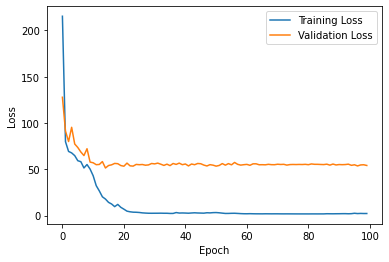

In [ ]:
# Define the batch size and number of epochs
batch_size = 32
epochs = 100

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Test 2
batch_size = 16
epochs = 100 
window_size = 5</br> 
loss: 2.0411 - val_loss: 54.1509

Epoch 1/100
29/29 [==============================] - 4s 95ms/step - loss: 2.6739 - val_loss: 57.3903
Epoch 2/100
29/29 [==============================] - 2s 86ms/step - loss: 9.3283 - val_loss: 55.2688
Epoch 3/100
29/29 [==============================] - 3s 86ms/step - loss: 18.0105 - val_loss: 50.2236
Epoch 4/100
29/29 [==============================] - 3s 87ms/step - loss: 10.8373 - val_loss: 55.9570
Epoch 5/100
29/29 [==============================] - 2s 86ms/step - loss: 6.7968 - val_loss: 54.2957
Epoch 6/100
29/29 [==============================] - 2s 86ms/step - loss: 4.6976 - val_loss: 55.4582
Epoch 7/100
29/29 [==============================] - 2s 86ms/step - loss: 3.3976 - val_loss: 53.6771
Epoch 8/100
29/29 [==============================] - 3s 88ms/step - loss: 2.8964 - val_loss: 53.9095
Epoch 9/100
29/29 [==============================] - 3s 88ms/step - loss: 2.3121 - val_loss: 53.4467
Epoch 10/100
29/29 [==============================] - 3s 88ms/step - loss: 2.1814 - val_l

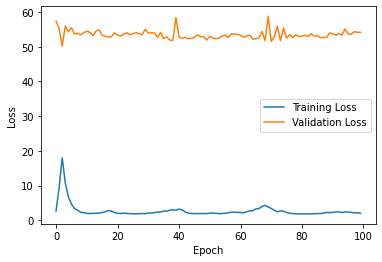

In [ ]:
# Define the batch size and number of epochs
batch_size = 16
epochs = 100

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Test 3
batch_size = 16 epochs = 100 window_size = 20 </br>
loss: 7.8502 - val_loss: 72.4562

Epoch 1/50
8/8 [==============================] - 22s 624ms/step - loss: 265.0389 - val_loss: 364.7350
Epoch 2/50
8/8 [==============================] - 2s 300ms/step - loss: 187.6457 - val_loss: 65.9392
Epoch 3/50
8/8 [==============================] - 2s 304ms/step - loss: 103.7175 - val_loss: 101.6911
Epoch 4/50
8/8 [==============================] - 2s 303ms/step - loss: 74.8583 - val_loss: 85.2685
Epoch 5/50
8/8 [==============================] - 2s 302ms/step - loss: 65.0110 - val_loss: 96.9992
Epoch 6/50
8/8 [==============================] - 2s 300ms/step - loss: 55.6708 - val_loss: 93.2313
Epoch 7/50
8/8 [==============================] - 2s 301ms/step - loss: 57.2928 - val_loss: 99.7744
Epoch 8/50
8/8 [==============================] - 2s 307ms/step - loss: 55.9884 - val_loss: 98.1301
Epoch 9/50
8/8 [==============================] - 2s 301ms/step - loss: 56.7729 - val_loss: 92.7648
Epoch 10/50
8/8 [==============================] - 2s 300ms/step - loss: 52.1892 - val_loss: 1

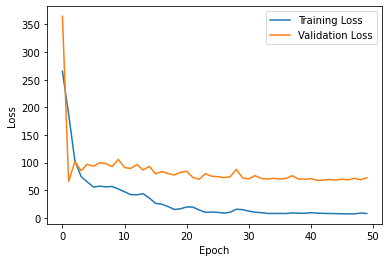

In [ ]:
# Define the batch size and number of epochs
batch_size = 16
epochs = 50

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test 4
model 2 </br>
batch_size = 16 epochs = 100 window_size = 20 </br>
loss: 16.6554 - val_loss: 74.6363

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 400, 64  0           []                               
                                0, 1)]                                                            
                                                                                                  
 time_distributed (TimeDistribu  (None, 20, 398, 638  160        ['input_1[0][0]']                
 ted)                           , 16)                                                             
                                                                                                  
 time_distributed_1 (TimeDistri  (None, 20, 199, 319  0          ['time_distributed[0][0]']       
 buted)                         , 16)                                                         

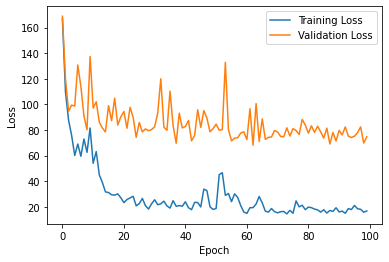

In [ ]:
# Define the CNN layers for processing the depth map
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))(depth_map_input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256, activation='relu'))(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout layer
cnn_output = tf.keras.layers.Flatten()(x)

# Define the LSTM layers for processing the other data (orientation + acceleration)
y = tf.keras.layers.LSTM(128, return_sequences=True)(other_data_input)
y = tf.keras.layers.Dropout(0.5)(y)  # Add dropout layer
lstm_output = tf.keras.layers.Flatten()(y)

# Concatenate the outputs from the CNN and LSTM layers
combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

# Define the output layers
z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(0.5)(z)  # Add dropout layer
grid_output = tf.keras.layers.Dense(1, activation='linear')(z)

# Define the model
model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=grid_output)
model.compile(optimizer='adam', loss='mse')

model.summary()

# Define the batch size and number of epochs
batch_size = 16
epochs = 100

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)
               
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Test 5
model 2 </br>
batch_size = 16 epochs = 100 window_size = 2  </br>
loss: 11.5243 - val_loss: 45.2927

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 2, 400, 640  0           []                               
                                , 1)]                                                             
                                                                                                  
 time_distributed_20 (TimeDistr  (None, 2, 398, 638,  160        ['input_3[0][0]']                
 ibuted)                         16)                                                              
                                                                                                  
 time_distributed_21 (TimeDistr  (None, 2, 199, 319,  0          ['time_distributed_20[0][0]']    
 ibuted)                         16)                                                        

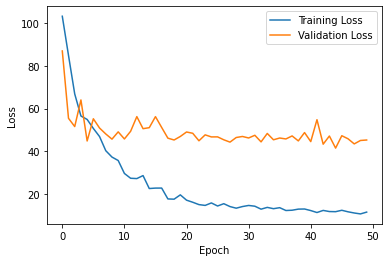

In [ ]:
# Define the CNN layers for processing the depth map
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(16, (3, 3), activation='relu'))(depth_map_input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2)))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(256, activation='relu'))(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout layer
cnn_output = tf.keras.layers.Flatten()(x)

# Define the LSTM layers for processing the other data (orientation + acceleration)
y = tf.keras.layers.LSTM(128, return_sequences=True)(other_data_input)
y = tf.keras.layers.Dropout(0.5)(y)  # Add dropout layer
lstm_output = tf.keras.layers.Flatten()(y)

# Concatenate the outputs from the CNN and LSTM layers
combined = tf.keras.layers.Concatenate()([cnn_output, lstm_output])

# Define the output layers
z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(0.5)(z)  # Add dropout layer
grid_output = tf.keras.layers.Dense(1, activation='linear')(z)

# Define the model
model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=grid_output)
model.compile(optimizer='adam', loss='mse')

model.summary()

# Define the batch size and number of epochs
batch_size = 16
epochs = 50

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)
               
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Test 6
Non-Time Series Model </br>
batch_size = 16
epochs = 50 </br>
loss: 11.7886 - val_loss: 31.9624

New Dataset
loss: 7.2079 - val_loss: 21.7943


In [ ]:
input_depth_data_set = depth_data
input_other_data_set = np.concatenate([ori_data, acc_data], axis=1)
output_grid_data_set = tf.keras.utils.to_categorical(np.array(grid_data) - 1, num_classes=28)


# Split the data into train, validation, and test sets
input_depth_train, input_depth_test, input_other_train, input_other_test, output_grid_train, output_grid_test = train_test_split(input_depth_data_set, input_other_data_set, output_grid_data_set, test_size=0.1, random_state=42)
input_depth_train, input_depth_valid, input_other_train, input_other_valid, output_grid_train, output_grid_valid = train_test_split(input_depth_train, input_other_train, output_grid_train, test_size=0.111, random_state=42)

# Check the shape of the resulting arrays
print("Train set shape:", input_depth_train.shape, input_other_train.shape, output_grid_train.shape)
print("Validation set shape:", input_depth_valid.shape, input_other_valid.shape, output_grid_valid.shape)
print("Test set shape:", input_depth_test.shape, input_other_test.shape, output_grid_test.shape)

Train set shape: (2296, 400, 640) (2296, 7) (2296, 28)
Validation set shape: (287, 400, 640) (287, 7) (287, 28)
Test set shape: (288, 400, 640) (288, 7) (288, 28)


In [ ]:
# Define the CNN layers for processing the depth map
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(depth_map_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout layer
cnn_output = x

# Define the Dense layers for processing the other data (orientation + acceleration)
y = tf.keras.layers.Dense(128, activation='relu')(other_data_input)
y = tf.keras.layers.Dropout(0.5)(y)  # Add dropout layer
dense_output = y

# Concatenate the outputs from the CNN and Dense layers
combined = tf.keras.layers.Concatenate()([cnn_output, dense_output])

# Define the output layers
z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(0.5)(z)  # Add dropout layer
grid_output = tf.keras.layers.Dense(28, activation='softmax')(z)

# Define the model
model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=grid_output)

# Set the optimizer with a learning rate of 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 400, 640, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 398, 638, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 199, 319, 16  0          ['conv2d_4[0][0]']               
                                )                                                           

In [ ]:
# Define the batch size and number of epochs
batch_size = 50
epochs = 50

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)

Epoch 1/50
46/46 [==============================] - 16s 254ms/step - loss: 6.6423 - accuracy: 0.0618 - val_loss: 3.0892 - val_accuracy: 0.1533
Epoch 2/50
46/46 [==============================] - 8s 180ms/step - loss: 3.0976 - accuracy: 0.0862 - val_loss: 2.8651 - val_accuracy: 0.1777
Epoch 3/50
46/46 [==============================] - 8s 181ms/step - loss: 2.9116 - accuracy: 0.1280 - val_loss: 2.7587 - val_accuracy: 0.1986
Epoch 4/50
46/46 [==============================] - 8s 182ms/step - loss: 2.7539 - accuracy: 0.1747 - val_loss: 2.6758 - val_accuracy: 0.2578
Epoch 5/50
46/46 [==============================] - 8s 182ms/step - loss: 2.5408 - accuracy: 0.2343 - val_loss: 2.5105 - val_accuracy: 0.2997
Epoch 6/50
46/46 [==============================] - 8s 181ms/step - loss: 2.4050 - accuracy: 0.2783 - val_loss: 2.4284 - val_accuracy: 0.2892
Epoch 7/50
46/46 [==============================] - 8s 181ms/step - loss: 2.2059 - accuracy: 0.3214 - val_loss: 2.3544 - val_accuracy: 0.2997
Epoch

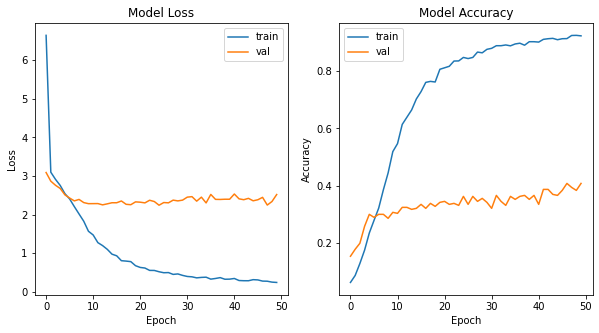

In [ ]:
# Plot the loss and accuracy of your model side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the loss on the left
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy on the right
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

# Test 6-2

loss: 0.1035 - accuracy: 0.9695 - val_loss: 2.0850 - val_accuracy: 0.5505 </br>
#### Filter Imgae
loss: 0.0782 - accuracy: 0.9777 - val_loss: 2.8564 - val_accuracy: 0.4764

In [ ]:
# Define the input shapes for the depth map and other data (orientation + acceleration)
depth_map_input = tf.keras.layers.Input(shape=(380, 540, 1))
other_data_input = tf.keras.layers.Input(shape=(7,))

In [ ]:
print(f'Original depth map is {len(depth_data)}')
def filter_image(input_depth, deviation):
    std_dev = np.std(input_depth, axis=(1, 2))
    std_dev_mask = std_dev > deviation
    return std_dev_mask

mask = filter_image(depth_data, 7)

# input_depth_data_set = depth_data
input_depth_data_set = np.expand_dims(depth_data[:, 10:390, 50:590], axis=-1)
input_other_data_set = np.concatenate([ori_data, acc_data], axis=1)
output_grid_data_set = tf.keras.utils.to_categorical(np.array(grid_data) - 1, num_classes=28)


input_depth_data_set = input_depth_data_set[mask]
input_other_data_set = input_other_data_set[mask]
output_grid_data_set = output_grid_data_set[mask]

print(f'Filtered depth map is {len(input_depth_data_set)}')



# Split the data into train, validation, and test sets
input_depth_train, input_depth_test, input_other_train, input_other_test, output_grid_train, output_grid_test = train_test_split(input_depth_data_set, input_other_data_set, output_grid_data_set, test_size=0.1, random_state=42)
input_depth_train, input_depth_valid, input_other_train, input_other_valid, output_grid_train, output_grid_valid = train_test_split(input_depth_train, input_other_train, output_grid_train, test_size=0.111, random_state=42)

# Check the shape of the resulting arrays
print("Train set shape:", input_depth_train.shape, input_other_train.shape, output_grid_train.shape)
print("Validation set shape:", input_depth_valid.shape, input_other_valid.shape, output_grid_valid.shape)
print("Test set shape:", input_depth_test.shape, input_other_test.shape, output_grid_test.shape)

Original depth map is 2871
Filtered depth map is 2636
Train set shape: (2108, 380, 540, 1) (2108, 7) (2108, 28)
Validation set shape: (264, 380, 540, 1) (264, 7) (264, 28)
Test set shape: (264, 380, 540, 1) (264, 7) (264, 28)


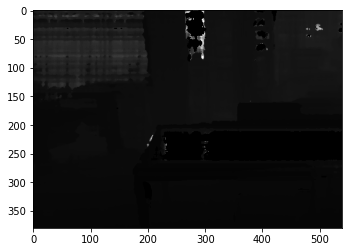

In [ ]:
# Plot first image in input_depth_train
plt.imshow(input_depth_train[20], cmap='gray')
plt.show()

In [ ]:
# Define the CNN layers for processing the depth map
x = tf.keras.layers.Conv2D(16, (3, 3))(depth_map_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout layer
cnn_output = x

# Define the Dense layers for processing the other data (orientation + acceleration)
y = tf.keras.layers.Dense(128, activation='relu')(other_data_input)
y = tf.keras.layers.Dropout(0.5)(y)  # Add dropout layer
y = tf.keras.layers.Dense(64, activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)  # Add dropout layer
dense_output = y

# Concatenate the outputs from the CNN and Dense layers
combined = tf.keras.layers.Concatenate()([cnn_output, dense_output])

# Define the output layers
z = tf.keras.layers.Dense(128, activation='relu')(combined)
z = tf.keras.layers.Dropout(0.5)(z)  # Add dropout layer
grid_output = tf.keras.layers.Dense(28, activation='softmax')(z)

# Define the model
model = tf.keras.Model(inputs=[depth_map_input, other_data_input], outputs=grid_output)

# Set the optimizer with a learning rate of 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 380, 540, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 378, 538, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 378, 538, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# Define the batch size and number of epochs
batch_size = 70
epochs = 50

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)

Epoch 1/50
31/31 [==============================] - 25s 328ms/step - loss: 3.5278 - accuracy: 0.0731 - val_loss: 2.9573 - val_accuracy: 0.1212
Epoch 2/50
31/31 [==============================] - 8s 267ms/step - loss: 3.0063 - accuracy: 0.1343 - val_loss: 2.7715 - val_accuracy: 0.1667
Epoch 3/50
31/31 [==============================] - 8s 268ms/step - loss: 2.7958 - accuracy: 0.1746 - val_loss: 2.6347 - val_accuracy: 0.1932
Epoch 4/50
31/31 [==============================] - 8s 268ms/step - loss: 2.5502 - accuracy: 0.2306 - val_loss: 2.5064 - val_accuracy: 0.2273
Epoch 5/50
31/31 [==============================] - 8s 270ms/step - loss: 2.3647 - accuracy: 0.2823 - val_loss: 2.3973 - val_accuracy: 0.2879
Epoch 6/50
31/31 [==============================] - 8s 272ms/step - loss: 2.1485 - accuracy: 0.3567 - val_loss: 2.3708 - val_accuracy: 0.3295
Epoch 7/50
31/31 [==============================] - 9s 276ms/step - loss: 1.9485 - accuracy: 0.4213 - val_loss: 2.2412 - val_accuracy: 0.3561
Epoch

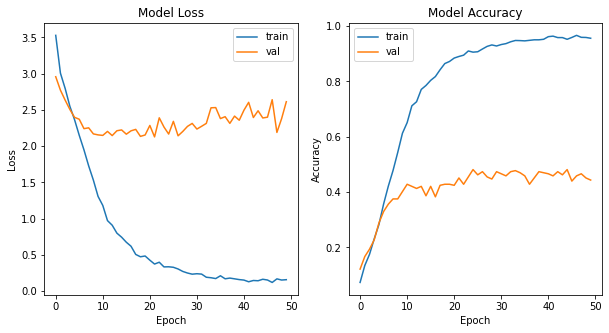

In [ ]:
# Plot the loss and accuracy of your model side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the loss on the left
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy on the right
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

In [ ]:
# Define the batch size and number of epochs
batch_size = 5
epochs = 50

# Train the model
history = model.fit(
    [input_depth_train, input_other_train],
    output_grid_train,
    validation_data=([input_depth_valid, input_other_valid], output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
)

Epoch 1/50
439/439 [==============================] - 13s 28ms/step - loss: 0.5594 - accuracy: 0.8532 - val_loss: 2.7756 - val_accuracy: 0.3927
Epoch 2/50
439/439 [==============================] - 11s 26ms/step - loss: 0.4021 - accuracy: 0.8892 - val_loss: 2.7793 - val_accuracy: 0.4327
Epoch 3/50
439/439 [==============================] - 12s 26ms/step - loss: 0.3483 - accuracy: 0.9034 - val_loss: 2.1718 - val_accuracy: 0.4618
Epoch 4/50
439/439 [==============================] - 12s 26ms/step - loss: 0.3627 - accuracy: 0.9002 - val_loss: 2.1629 - val_accuracy: 0.4655
Epoch 5/50
439/439 [==============================] - 12s 26ms/step - loss: 0.2791 - accuracy: 0.9271 - val_loss: 2.4083 - val_accuracy: 0.4982
Epoch 6/50
439/439 [==============================] - 11s 26ms/step - loss: 0.2962 - accuracy: 0.9248 - val_loss: 2.1249 - val_accuracy: 0.4509
Epoch 7/50
439/439 [==============================] - 11s 26ms/step - loss: 0.2284 - accuracy: 0.9362 - val_loss: 2.3569 - val_accuracy:

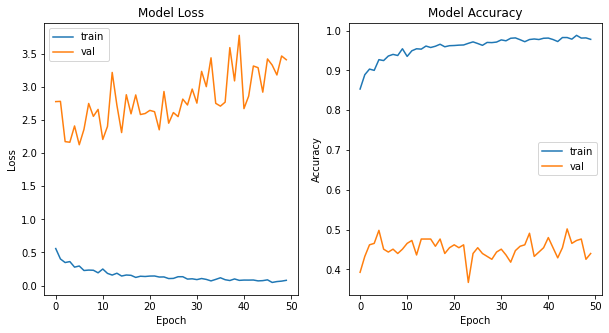

In [ ]:
# Plot the loss and accuracy of your model side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the loss on the left
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy on the right
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

# Test 7

In [ ]:
input_depth_data_set = depth_data
input_other_data_set = np.concatenate([ori_data, acc_data], axis=1)
output_grid_data_set = grid_data


# Split the data into train, validation, and test sets
input_depth_train, input_depth_test, input_other_train, input_other_test, output_grid_train, output_grid_test = train_test_split(input_depth_data_set, input_other_data_set, output_grid_data_set, test_size=0.1, random_state=42)
input_depth_train, input_depth_valid, input_other_train, input_other_valid, output_grid_train, output_grid_valid = train_test_split(input_depth_train, input_other_train, output_grid_train, test_size=0.111, random_state=42)

# Check the shape of the resulting arrays
print("Train set shape:", input_depth_train.shape, input_other_train.shape, output_grid_train.shape)
print("Validation set shape:", input_depth_valid.shape, input_other_valid.shape, output_grid_valid.shape)
print("Test set shape:", input_depth_test.shape, input_other_test.shape, output_grid_test.shape)

Train set shape: (2296, 400, 640) (2296, 7) (2296,)
Validation set shape: (287, 400, 640) (287, 7) (287,)
Test set shape: (288, 400, 640) (288, 7) (288,)


In [ ]:
# Define the CNN layers for processing the depth map
x = tf.keras.layers.Conv2D(16, (3, 3))(depth_map_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout layer
cnn_output = x

# Define the output layers
z = tf.keras.layers.Dense(128, activation='relu')(cnn_output)
z = tf.keras.layers.Dropout(0.5)(z)  # Add dropout layer
grid_output = tf.keras.layers.Dense(28, activation='softmax')(z)

# Define the model
model = tf.keras.Model(inputs=depth_map_input, outputs=grid_output)

# Set the optimizer with a learning rate of 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 380, 540, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 378, 538, 16)      160       
                                                                 
 batch_normalization_4 (Batc  (None, 378, 538, 16)     64        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 378, 538, 16)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 189, 269, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 187, 267, 32)      4640

In [ ]:
# Define the batch size and number of epochs
batch_size = 70
epochs = 50

# Train the model
history = model.fit(
    input_depth_train,
    output_grid_train,
    validation_data=(input_depth_valid, output_grid_valid),
    batch_size=batch_size,
    epochs=epochs,
)


Epoch 1/50
32/32 [==============================] - 9s 290ms/step - loss: 0.1727 - accuracy: 0.9494 - val_loss: 2.2541 - val_accuracy: 0.4873
Epoch 2/50
32/32 [==============================] - 9s 278ms/step - loss: 0.1841 - accuracy: 0.9490 - val_loss: 2.2218 - val_accuracy: 0.4873
Epoch 3/50
32/32 [==============================] - 9s 279ms/step - loss: 0.1579 - accuracy: 0.9581 - val_loss: 2.4522 - val_accuracy: 0.4618
Epoch 4/50
32/32 [==============================] - 9s 290ms/step - loss: 0.1908 - accuracy: 0.9499 - val_loss: 2.4302 - val_accuracy: 0.4836
Epoch 5/50
32/32 [==============================] - 9s 281ms/step - loss: 0.1621 - accuracy: 0.9558 - val_loss: 2.6182 - val_accuracy: 0.4945
Epoch 6/50
32/32 [==============================] - 9s 280ms/step - loss: 0.1634 - accuracy: 0.9572 - val_loss: 2.5355 - val_accuracy: 0.4655
Epoch 7/50
32/32 [==============================] - 9s 278ms/step - loss: 0.1685 - accuracy: 0.9544 - val_loss: 2.4108 - val_accuracy: 0.4836
Epoch 

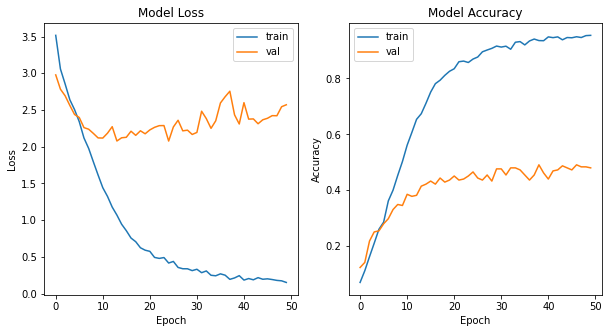

In [ ]:
# Plot the loss and accuracy of your model side-by-side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the loss on the left
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy on the right
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import files
files.download('/content/my_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Testing

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(input_depth_test, output_grid_test, batch_size=batch_size, verbose=1)

print("Test loss:", loss)

4/4 [==============================] - 0s 89ms/step - loss: 2.3782 - accuracy: 0.4764
Test loss: [2.378230094909668, 0.4763636291027069]


In [ ]:
# Evaluate the model on the test set
loss = model.evaluate([input_depth_test, input_other_test], output_grid_test, batch_size=batch_size, verbose=1)

print("Test loss:", loss)

4/4 [==============================] - 0s 85ms/step - loss: 2.4287 - accuracy: 0.4848
Test loss: [2.428739309310913, 0.4848484992980957]


In [ ]:
val = model.predict([input_depth_test, input_other_test])
print(val.shape)
predict_ind = np.argmax(val, axis=1)
print("Prediction")
print(predict_ind.flatten())
real_ind = np.argmax(output_grid_test, axis=1)
print("True")
print(real_ind.flatten())

9/9 [==============================] - 1s 33ms/step
(264, 28)
Prediction
[ 8 15 25 16 17  4 19 10  9 26 15 18 15 19  2  5  9 19 17  9  9  3  9  8
 12  8  9  9  8 17 17  9 16  2 17 19 18 16  9  8  9  1 11  2 12 17  8  8
  4 18 19  1  9 18 17  2  9 18 10 17 15  2 17 16  7  8 17  9 15 26  3  1
  7  1 17  1  7  9 16  9  0  8  3  1  0 18  7  8  4 15 19 18 15 10 15 12
 15 18 19 15  7 19 18 12  9  3 17 26  8 11 12 10  8 16 17  2 26 17  8 16
 16 17  4  4  9 18 26  7  9 15 17 16  9  1 16 18 15 17 19 11  3 18 17  4
 17 17 17  8  4 19  7 17  9  3  8 10 15 15  8 17  2 18 19  8 10  7 15 17
  2 15  2  1 16 10 17 17  9  1 16  8  8 17  8 17 17  8 19 19 15  0  2 18
 17 17 10  9 16  8  9  8 10  9 17  0 15  9 19 17 10 19  4  0  8  4 19 17
 19 19 15  2 16 15 19 26  2  1  9  1  8  9  2 19  1  3 18 18 17  9  1  9
 12  4 17  9 17  9 19  0 12  9 19 16 17 18 17  9  8 10 10  8 16  9 17  1]
True
[12 17 26 19 17  4 19 10  7 26 17 18 19 19  2  5  8 19 17  8  9  4  5  9
 19 10  9  2  8 17 18 15 17  4 16 19 19 16 11

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a result matrix

result_matrix = confusion_matrix(predict_ind, real_ind)
print(result_matrix)

[[ 0  0  1  1  1  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  2  0  1  0  0  1  1  1  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  7  0  1  0  0  1  0  0  0  0  1  0  1  0  0  0  0  1]
 [ 0  0  1  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  3  1  0  1  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  1  0  2  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  1  0  1  8  6  4  0  1  1  0  2  0  0  0  0  0]
 [ 0  2  1  0  0  1  1  5 15  1  1  1  2  3  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  9  0  0  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  5  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  0  0 11  2  2  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  1  0  0  1  7  1  0  2  0  0  1]
 [ 0  1  1  0  0  0  0  0  2  2  1  0  2  3 20  3  5  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  0  0  1  1  0 10  3  0

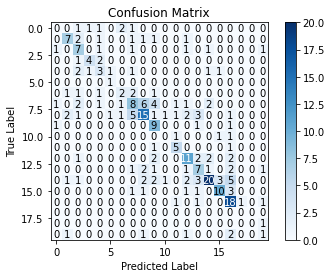

In [ ]:
# Visualize the confusion matrix using Matplotlib
fig, ax = plt.subplots()
im = ax.imshow(result_matrix, cmap='Blues')

# Add axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add text annotations
thresh = result_matrix.max() / 2
for i in range(result_matrix.shape[0]):
    for j in range(result_matrix.shape[1]):
        ax.text(j, i, format(result_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if result_matrix[i, j] > thresh else "black")

# Show the plot
plt.show()

In [ ]:
curr_pos_data = df[['pos_x', 'pos_y']].to_numpy()

pos_train, pos_test = train_test_split(curr_pos_data, test_size=0.1, random_state=42)

In [ ]:
predict_ind = list(predict_ind)

<ipython-input-39-fe855b4e540d>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("hsv", 29)


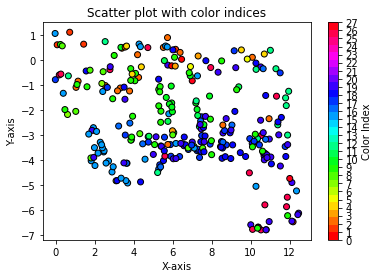

In [ ]:
# Your XY coordinates and color index list
xy_coords = pos_test
color_indices = predict_ind

# Generate a colormap with 29 colors
cmap = plt.cm.get_cmap("hsv", 29)

# Create a scatter plot with the XY coordinates and color indices
plt.scatter(xy_coords[:, 0], xy_coords[:, 1], c=color_indices, cmap=cmap, edgecolors='k')

# Add a colorbar to show the color index mapping
cbar = plt.colorbar(ticks=range(29))
cbar.set_label("Color Index")

# Set x-axis and y-axis labels
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Set a title for the plot
plt.title("Scatter plot with color indices")

# Show the plot
plt.show()